In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
class Neuralnetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inputnodes = inputnodes
        self.hiddennodes = hiddennodes
        self.outputnodes = outputnodes
        self.lr = learningrate

        # weights between input and hidden layer (wih) and hidden and output layer (who) initalized
        self.wih = np.random.random((self.hiddennodes, self.inputnodes))*2-1
        print("hidden shape: ", self.wih.shape)
        self.who = np.random.random((self.outputnodes, self.hiddennodes))*2-1
        print("output shape: ", self.who.shape)

        # activation function
        self.activation_function = lambda x: 1/(1+np.exp(-x))
        

    def train(self, X, y) -> None:
        ### Forward pass ###
        input = np.array(X, ndmin=2).T
        target = np.array(y, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, input)
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        ### Backward pass ###
        # error
        output_errors = target - final_outputs

        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot(
            (output_errors * final_outputs * (1.0 - final_outputs)),
            np.transpose(hidden_outputs)
            )

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot(
            (hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
            np.transpose(input)
            )
        
    def query(self, X) -> np.ndarray:
        # convert input list to 2d array
        inputs = np.array(X, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)

        # calculate the signals emerging from hidden layer (more could be done with a loop)
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)

        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

    def _clean_predict_data(self,data):
        all_values = data.split(',')
        label = int(all_values[0])
        given_number = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        predicted = n.query(given_number)
        return label, np.argmax(predicted)

    def test_network(self,data):
        scorecard = []
        for record in data:
            label, predicted = self._clean_predict_data(record)
            if label == predicted:
                scorecard.append(1)
            else:
                scorecard.append(0)
        print("performance: ", sum(scorecard)/len(scorecard))
            

# Train Neural Net

In [63]:
with open("./mnist/mnist_train.csv") as f:
    train_data = f.readlines()

with open("./mnist/mnist_test.csv") as f:
    test_data = f.readlines()

label:  5


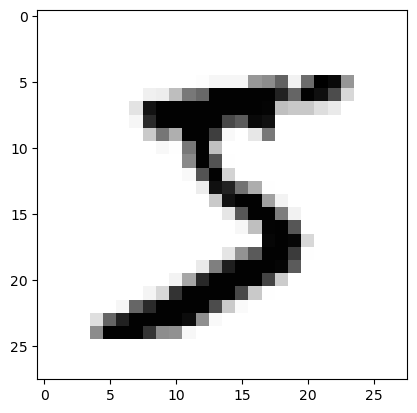

In [64]:
all_values = train_data[0].split(',')
label = all_values[0]
print("label: ", label)
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')
plt.show()

In [30]:
# normalize data
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [33]:
# create target output
target = np.zeros(10) + 0.01
target[int(label)] = 0.99
print("target: ", target)

target:  [0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


In [93]:
# create neural network
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

n = Neuralnetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

hidden shape:  (100, 784)
output shape:  (10, 100)


In [39]:
# generate random list of 784 values between 0 and 1
rand_i = np.random.random((784))

n.query(rand_i)

array([[0.04655014],
       [0.41899206],
       [0.66851968],
       [0.24718467],
       [0.97680858],
       [0.91396528],
       [0.03407594],
       [0.93211661],
       [0.99963456],
       [0.95025629]])

In [96]:
# before training
n.who[0,0]

0.4667441570578942

In [94]:
# train the network

for record in train_data:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    # train the network
    n.train(inputs, targets)


In [95]:
# after training
n.who[0,0]

0.4667441570578942

# Test des Netztes

In [65]:
# test the network
all_test_values = test_data[0].split(',')

In [66]:
print("label: ", all_test_values[0])

label:  7


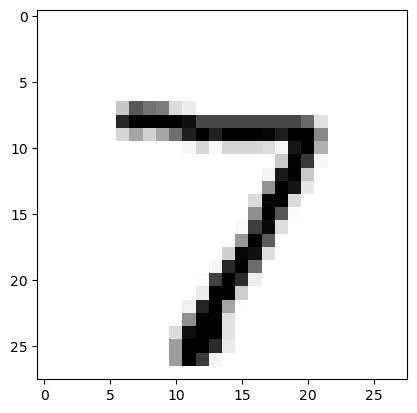

In [67]:
plt.imshow(np.asfarray(all_test_values[1:]).reshape((28, 28)), cmap='Greys', interpolation='None')
plt.show()

In [68]:
predicted = n.query((np.asfarray(all_test_values[1:]) / 255.0 * 0.99) + 0.01)

In [69]:
predicted

array([[1.02718290e-03],
       [2.59756804e-04],
       [9.96705005e-04],
       [2.80945538e-04],
       [1.15931413e-02],
       [6.88155179e-04],
       [2.04913637e-03],
       [9.92606120e-01],
       [4.75489871e-04],
       [2.54544712e-02]])

In [70]:
print("predicted: ", np.argmax(predicted), "actual: ", all_test_values[0])

predicted:  7 actual:  7


In [77]:
# test the network

def clean_predict_data(data):
    all_values = data.split(',')
    label = int(all_values[0])
    given_number = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    predicted = n.query(given_number)
    return label, np.argmax(predicted)

In [83]:

def test_network(data):
    scorecard = []
    for record in data:
        label, predicted = clean_predict_data(record)
        if label == predicted:
            scorecard.append(1)
        else:
            scorecard.append(0)
    print("performance: ", sum(scorecard)/len(scorecard))

In [97]:
n.test_network(test_data)

performance:  0.9392
